# **Performing Gradient Descent in Regression.**

In [8]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

preparing dataset. Random data points of 500 x 2

In [9]:
data = np.random.randn(500, 2)

In [17]:
data[0]


array([1.47461802, 1.11325458])

In [19]:
data[0,0]

np.float64(1.4746180228343042)

In [20]:
(data[0,1])


np.float64(1.1132545767888096)

In [22]:
theta=np.zeros(2)

In [23]:
theta

array([0., 0.])

**Loss Function**

In [24]:
def loss_function(data,theta):

    #get m and b
    m = theta[0]
    b = theta[1]

    loss = 0

    #for each iteration
    for i in range(0, len(data)):

        #get x and y
        x = data[i, 0]
        y = data[i, 1]

        #predict the value of y
        y_hat = (m*x + b)

        #compute loss as given in quation (2)
        loss = loss + ((y - (y_hat)) ** 2)

    #mean sqaured error
    mse = loss / float(len(data))

    return mse

In [25]:
loss_function(data, theta)

np.float64(0.9550306709023125)

**Gradient of Loss function**

In [26]:
def compute_gradients(data, theta):

    gradients = np.zeros(2)

    #total number of data points
    N = float(len(data))

    m = theta[0]
    b = theta[1]

    #for each data point
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]

        #gradient of loss function with respect to m as given in (3)
        gradients[0] += - (2 / N) * x * (y - (( m* x) + b))

        #gradient of loss funcction with respect to b as given in (4)
        gradients[1] += - (2 / N) * (y - ((theta[0] * x) + b))

    #add epsilon to avoid division by zero error
    epsilon = 1e-6
    gradients = np.divide(gradients, N + epsilon)

    return gradients

In [28]:
compute_gradients(data,theta)


array([ 0.00020378, -0.00031041])

In [29]:
num_iterations=50000

In [30]:
#Learning rate
lr=1e-2

Define a list called loss for storing the loss on every iterations: On each iteration, calculate gradients and update the gradients according to our paramater update rule:



In [31]:
loss=[]

In [32]:
theta = np.zeros(2)

for t in range(num_iterations):

    #compute gradients
    gradients = compute_gradients(data, theta)

    #update parameter
    theta = theta - (lr*gradients)

    #store the loss
    loss.append(loss_function(data,theta))


Text(0.5, 1.0, 'Gradient Descent')

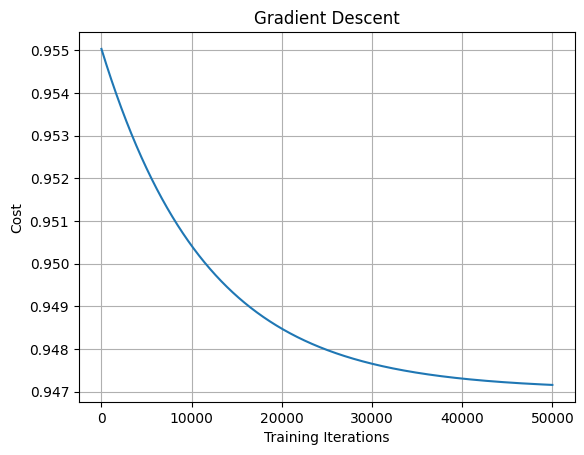

In [33]:
plt.plot(loss)
plt.grid()
plt.xlabel('Training Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent')

#**Gradient descent versus stochastic gradient descent**

In [37]:
import numpy as np
import random
import math

def minibatch(data, theta, lr=1e-2, minibatch_ratio=0.01, num_iterations=1000):
    """
    Performs mini-batch gradient descent on the given data.

    Parameters:
    data: numpy array of shape (n_samples, n_features + 1) where the last column is the target
    theta: numpy array of shape (n_features, 1) - model parameters
    lr: learning rate (default: 0.01)
    minibatch_ratio: ratio of data to use in each mini-batch (default: 0.01)
    num_iterations: number of iterations to perform (default: 1000)

    Returns:
    theta: updated model parameters
    """
    # Calculate mini-batch size
    minibatch_size = int(math.ceil(len(data) * minibatch_ratio))

    # Perform gradient descent for the specified number of iterations
    for t in range(num_iterations):
        # Randomly select indices for the mini-batch
        sample_indices = random.sample(range(len(data)), minibatch_size)

        # Sample the data based on the selected indices
        sample_data = data[sample_indices, :]

        # Compute gradients for the sampled data
        grad = compute_gradients(sample_data, theta)

        # Update model parameters
        theta = theta - (lr * grad)

    return theta

def compute_gradients(data, theta):
    """
    Computes the gradients of the loss function with respect to theta.

    Parameters:
    data: numpy array of shape (n_samples, n_features + 1) where the last column is the target
    theta: numpy array of shape (n_features, 1) - model parameters

    Returns:
    gradients: numpy array of shape (n_features, 1)
    """
    # Separate features and target
    X = data[:, :-1]
    y = data[:, -1].reshape(-1, 1)

    # Number of samples
    m = X.shape[0]

    # Compute predictions
    predictions = X @ theta

    # Compute error
    error = predictions - y

    # Compute gradients (for mean squared error)
    gradients = (1/m) * (X.T @ error)

    return gradients


In [38]:
# Example usage
# Generate some random data
n_samples = 1000
n_features = 5
X = np.random.randn(n_samples, n_features)
true_theta = np.random.randn(n_features, 1)
y = X @ true_theta + 0.1 * np.random.randn(n_samples, 1)

# Combine features and target
data = np.hstack((X, y))

# Initialize theta
initial_theta = np.zeros((n_features, 1))

# Run mini-batch gradient descent
optimized_theta = minibatch(data, initial_theta, lr=0.01, minibatch_ratio=0.1, num_iterations=1000)

print("True theta:", true_theta.flatten())
print("Optimized theta:", optimized_theta.flatten())


True theta: [ 0.27806592 -0.38708071 -0.78068821 -1.3918178  -0.54505763]
Optimized theta: [ 0.27655312 -0.38890837 -0.77665678 -1.39445517 -0.5484201 ]


# **Momentum-based gradient descent**

In [40]:
import numpy as np

def momentum(data, theta, lr=1e-2, gamma=0.9, num_iterations=1000):
    velocity = np.zeros_like(theta)

    for i in range(num_iterations):
        grad = compute_gradient(data, theta)  # You need to define this separately
        velocity = gamma * velocity + lr * grad
        theta -= velocity

    return theta
